# Intro to AI with Handwritten Digits (10th Grade)

In this notebook, we will build a **complete mini AI project** using the famous `digits` dataset from scikit-learn.

By the end, you will:

- Load and explore real data (images of handwritten digits)
- Visualize the images as 8×8 grayscale pictures
- Split data into **training** and **testing** sets
- Train a simple **machine learning model** (Logistic Regression)
- Evaluate how accurate the model is
- Look at some predictions and see where the model is right or wrong

All comments are written so that a 10th-grade student seeing AI for the first time can follow along.


## Project Roadmap

1. Import libraries (Python tools we need)  
2. Load the handwritten digits dataset  
3. Look at the raw data and understand its shape  
4. Show a digit image and its label  
5. Visualize several digit images in a grid  
6. Split data into **train** and **test** sets  
7. Train a classifier (Logistic Regression)  
8. Evaluate the model with accuracy and a confusion matrix  
9. Inspect some sample predictions (where the model is right or wrong)  
10. Optional: Try your own experiments  


In [1]:
# ==============================================
# 1. Import libraries and fix matplotlib issue
# ==============================================

# We import all the tools we will need for this project.
# - numpy:     works with numbers and arrays
# - matplotlib: lets us draw images and charts
# - sklearn:   gives us datasets and ML algorithms

!pip install "matplotlib==3.8.2"
!pip install "scikit-learn==1.4.2"

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# ----------------------------------------------------------
# Matplotlib compatibility fix
# ----------------------------------------------------------
# In some notebook environments (especially online ones),
# older helper code may call `matplotlib.rcParams._get`,
# but in newer versions this internal method was removed.
#
# To avoid errors like:
#   AttributeError: 'RcParams' object has no attribute '_get'
# we safely create an alias that points `_get` to `__getitem__`.
# This keeps everything working without changing how plots look.

if not hasattr(matplotlib.rcParams, "_get"):
    matplotlib.rcParams._get = matplotlib.rcParams.__getitem__

print("Python and library versions:")
import sys, sklearn
print("Python:", sys.version.split()[0])
print("matplotlib:", matplotlib.__version__)
print("scikit-learn:", sklearn.__version__)



[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Python and library versions:
Python: 3.9.20
matplotlib: 3.8.2
scikit-learn: 1.4.2


## 2. Load the handwritten digits dataset

scikit-learn has a built-in dataset called **digits**. It contains:

- 1797 images of handwritten digits (0–9)  
- Each image is 8×8 pixels (very small, on purpose)  
- Each pixel is a number from 0 to 16 (how dark the pixel is)  

We will load the dataset and inspect its shape.


In [2]:
# ==============================================
# 2. Load the digits dataset
# ==============================================

digits = load_digits()

# `digits.data` is a 2D array where each row is one image,
# flattened into 64 numbers (8x8 pixels).
X = digits.data      # features (pixel values)
y = digits.target    # labels (which digit 0-9)

print("Number of samples (images):", X.shape[0])
print("Number of features (pixels per image):", X.shape[1])
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("Unique digit labels:", np.unique(y))


Number of samples (images): 1797
Number of features (pixels per image): 64
Shape of X: (1797, 64)
Shape of y: (1797,)
Unique digit labels: [0 1 2 3 4 5 6 7 8 9]


## 3. Visualize one digit image

Right now each image is stored as a **flat vector** of 64 numbers.  
For plotting, we need to reshape it into an **8×8 image**.

We will:

1. Pick an index (for example, 0)  
2. Print its label (the correct digit)  
3. Print the first few pixel values  
4. Reshape it into 8×8 and display it as an image  


True label for this image: 0
Flat image shape (number of pixels): (64,)
First 20 pixel values: [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.]


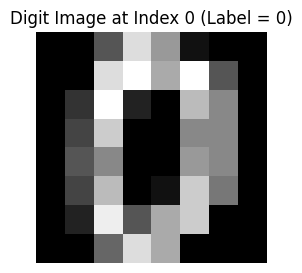

In [3]:
# ==============================================
# 3. Pick one image and display it
# ==============================================

# You can change this index to look at different images.
# Try index = 5, 10, 100, etc.
index = 0

# 1D (flat) array of 64 pixel values
flat_image = X[index]
true_label = y[index]

print("True label for this image:", true_label)
print("Flat image shape (number of pixels):", flat_image.shape)
print("First 20 pixel values:", flat_image[:20])

# Reshape the 1D array (64,) into a 2D array (8, 8)
image_2d = flat_image.reshape(8, 8)

# Show the image using matplotlib
plt.figure(figsize=(3, 3))
plt.imshow(image_2d, cmap="gray")
plt.title(f"Digit Image at Index {index} (Label = {true_label})")
plt.axis("off")
plt.show()


## 4. Visualize a grid of digit images

Looking at a single digit is nice, but looking at **many** helps us
understand the dataset better.

We will plot the first 16 images in a 4×4 grid.


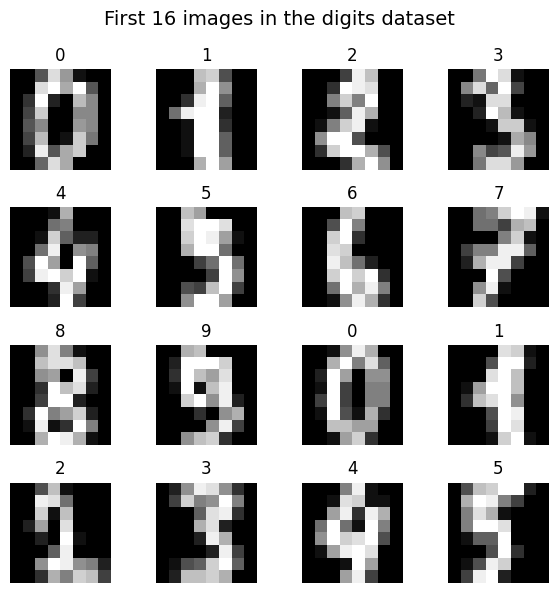

In [4]:
# ==============================================
# 4. Show a grid of 16 digit images
# ==============================================

num_images = 16
rows = 4
cols = 4

plt.figure(figsize=(6, 6))

for i in range(num_images):
    # Select the i-th image and label
    img = X[i].reshape(8, 8)
    label = y[i]

    # Add a subplot in the grid
    ax = plt.subplot(rows, cols, i + 1)
    ax.imshow(img, cmap="gray")
    ax.set_title(str(label))
    ax.axis("off")

plt.suptitle("First 16 images in the digits dataset", fontsize=14)
plt.tight_layout()
plt.show()


## 5. Split data into training and testing sets

We want to train our model on part of the data and **test** it on data it has never seen before.  
This helps us get a realistic estimate of how well the model will perform on new images.

We will use:

- 90% of the data for **training**  
- 10% of the data for **testing**  


In [5]:
# ==============================================
# 5. Split into train and test sets (70/30 split)
# ==============================================

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


Training set shape: (1617, 64)
Test set shape: (180, 64)
Training labels shape: (1617,)
Test labels shape: (180,)


## 6. Train a Logistic Regression classifier

We will train a **Logistic Regression** model, which is a common and simple
machine learning algorithm for classification problems.

Steps:

1. Create the model object  
2. Fit (train) the model using the training data  
3. Measure how long training takes (just for curiosity)  


In [6]:
# ==============================================
# 6. Train the Logistic Regression model
# ==============================================

# We increase max_iter so the model has enough steps to converge.
model = LogisticRegression(max_iter=2000, solver="lbfgs", multi_class="auto")

print("Training the model...")
import time
start_time = time.time()

model.fit(X_train, y_train)

end_time = time.time()
print("Training finished.")
print(f"Training time: {end_time - start_time:.2f} seconds")


Training the model...
Training finished.
Training time: 2.07 seconds


## 7. Evaluate the model

Now we will:

1. Use the model to **predict** labels for the test set  
2. Calculate the **accuracy** (percentage of correct predictions)  
3. Show a **confusion matrix** to see which digits are hardest for the model  


Test accuracy: 96.67%


<Figure size 600x600 with 0 Axes>

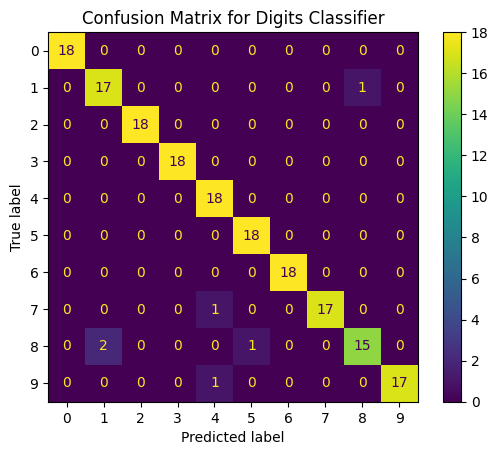

In [7]:
# ==============================================
# 7. Evaluate the model
# ==============================================

# Make predictions on the test set
y_pred = model.predict(X_test)

# 1. Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"Test accuracy: {acc * 100:.2f}%")

# 2. Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(values_format="d")
plt.title("Confusion Matrix for Digits Classifier")
plt.show()


## 8. Look at some sample predictions

It is very important to **look at real examples**, not just numbers.

We will:

- Show a few test images  
- Print the **true label** and the **predicted label**  
- Highlight where the model gets things wrong  


/tmp/ipykernel_296/944810074.py:29: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  plt.tight_layout()
/toolkit-cache/1.1.4/python3.9/kernel-libs/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


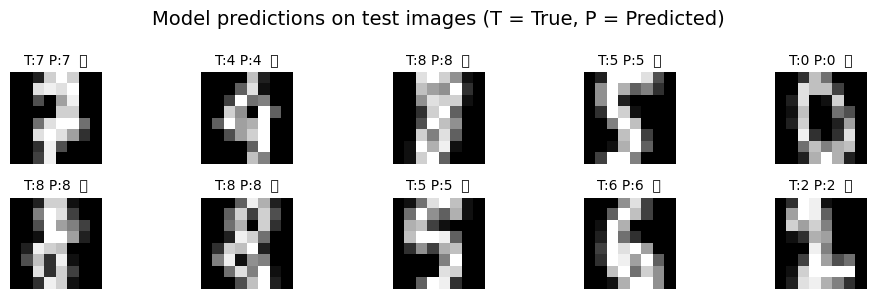

In [8]:
# ==============================================
# 8. Show some predictions
# ==============================================

num_examples = 10

plt.figure(figsize=(10, 3))

for i in range(num_examples):
    img = X_test[i].reshape(8, 8)
    true_label = y_test[i]
    pred_label = y_pred[i]

    ax = plt.subplot(2, 5, i + 1)
    ax.imshow(img, cmap="gray")
    ax.axis("off")

    # Title shows true vs predicted label
    title = f"T:{true_label} P:{pred_label}"
    # If wrong, add an exclamation mark
    if true_label != pred_label:
        title += "  ❌"
    else:
        title += "  ✅"

    ax.set_title(title, fontsize=10)

plt.suptitle("Model predictions on test images (T = True, P = Predicted)", fontsize=14)
plt.tight_layout()
plt.show()


## 9. Optional: Try your own experiments

Here are some ideas you can try (or the teacher can assign as mini-exercises):

1. **Change the train/test split**  
   - What happens if you use `test_size=0.3` or `test_size=0.1`?  
   - Does the accuracy change? Why?  

2. **Train on fewer samples**  
   - Try training the model on only 20%, 40%, or 60% of the original data.  
   - How does that affect accuracy?  

3. **Try a different model**  
   - From `sklearn.neighbors import KNeighborsClassifier`  
   - Replace `LogisticRegression` with `KNeighborsClassifier(n_neighbors=3)`  
   - Compare the accuracy and confusion matrix.  

4. **Look at only one digit**  
   - Filter the dataset to only digits `0` and `1`, and train a model to distinguish between them.  
   - This is called a **binary classification** problem.  

Feel free to add new cells below and experiment! That’s how real AI researchers learn.


In [9]:
# ==========================================================
# K-Nearest Neighbors (KNN) Classifier  (K=3, also tried 5)
# ==========================================================

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create the model:
# n_neighbors = 3 means the model looks at the 3 closest images.
knn_model = KNeighborsClassifier(n_neighbors=2)
print("Training KNN model...")
knn_model.fit(X_train, y_train)
print("Training complete!")

# Make predictions on the test set
knn_pred = knn_model.predict(X_test)

# Calculate accuracy
knn_acc = accuracy_score(y_test, knn_pred)
print(f"KNN Test Accuracy: {knn_acc * 100:.2f}%")

# Show a few predictions to compare with logistic regression
print("\nSample Predictions (first 10):")
for i in range(10):
    print(f"Image {i}: True = {y_test[i]}, Predicted = {knn_pred[i]}")

Training KNN model...
Training complete!
KNN Test Accuracy: 98.33%

Sample Predictions (first 10):
Image 0: True = 7, Predicted = 7
Image 1: True = 4, Predicted = 4
Image 2: True = 8, Predicted = 8
Image 3: True = 5, Predicted = 5
Image 4: True = 0, Predicted = 0
Image 5: True = 8, Predicted = 8
Image 6: True = 8, Predicted = 8
Image 7: True = 5, Predicted = 5
Image 8: True = 6, Predicted = 6
Image 9: True = 2, Predicted = 2


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7009b495-40b0-4ce5-afa3-0de72297416c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>